In [ ]:
from seaborn.rcmod import plotting_context
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import seaborn as sns; sns.set()
from sklearn.datasets import load_breast_cancer, load_digits
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs

In [ ]:
# Load the data set
X_bc, y_bc = load_breast_cancer(return_X_y = True)

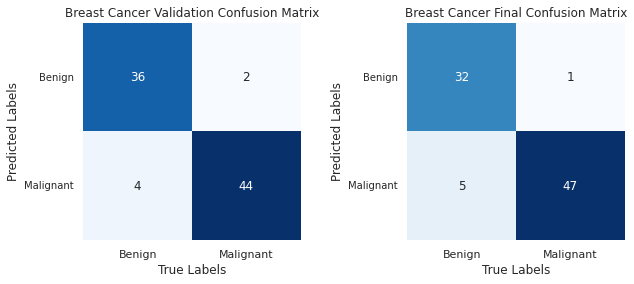


Decision Tree Classifier Cancer Cell Accuracy Results:
------------------------------------------------------
Validation Test Accuracy: 0.93
Final Test Accuracy: 0.93


In [120]:
# Decision Tree Classifier (Cancer Cell Dataset)

# Split into validation, training, and testing sets
X_train, X_remaining, y_train, y_remaining = train_test_split(X_bc, y_bc, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size = 0.5)

# Train and predict using training and validation sets
Decision_Val = tree.DecisionTreeClassifier()
Decision_Val.fit(X_train, y_train)

# Prediction
y_val_hat = Decision_Val.predict(X_val)

# Print the confusion matrix
plt.subplot(1,2,1)
CM_bc = confusion_matrix(y_val, y_val_hat)

ax = sns.heatmap(CM_bc.T, square=True, annot=True, 
                 fmt='d', cbar=False, cmap="Blues")

ax.set_xticklabels(('Benign','Malignant'))
ax.set_yticklabels(('Benign','Malignant'), 
    rotation=0, fontsize="10", va="center")

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");
plt.title("Breast Cancer Validation Confusion Matrix")

# Caluclate the accuracy of the validation training
accuracy = round(accuracy_score(y_val, y_val_hat),2)

# Gain the testing training data set
X_final_training = np.concatenate((X_train, X_val))
y_final_training = np.concatenate((y_train, y_val))

# Create new decision tree model
Decision_Final = tree.DecisionTreeClassifier()
Decision_Final.fit(X_final_training, y_final_training)
y_final_hat = Decision_Final.predict(X_test)

# Create new subplot
plt.subplot(1,2,2)

# Print new confusion matrix
CM_bc_final = confusion_matrix(y_test, y_final_hat)

ax = sns.heatmap(CM_bc_final.T, square=True, annot=True, 
                 fmt='d', cbar=False, cmap="Blues")

ax.set_xticklabels(('Benign','Malignant'))
ax.set_yticklabels(('Benign','Malignant'), 
    rotation=0, fontsize="10", va="center")

# Adjust the different subplots
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");
plt.title("Breast Cancer Final Confusion Matrix")
plt.subplots_adjust(right = 1.5)
plt.show()

print("\nDecision Tree Classifier Cancer Cell Accuracy Results:\n"
      "------------------------------------------------------")

# Print the accuracy results of both tests
print(f"Validation Test Accuracy: {accuracy}")

final_accuracy = round(accuracy_score(y_test, y_final_hat),2)

print(f"Final Test Accuracy: {final_accuracy}")

In [ ]:
# Make a new data set
X, y = make_blobs(n_samples = 400, centers = 3, random_state = 0)

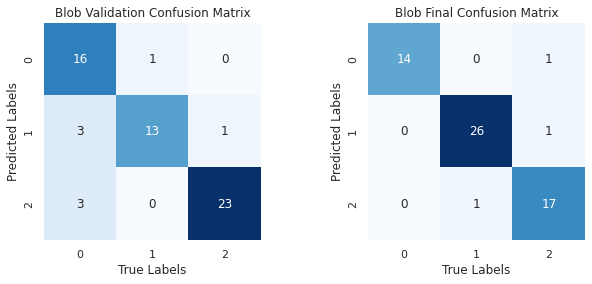


Decision Tree Classifier Blob Accuracy Results:
-----------------------------------------------
Validation Test Accuracy: 0.87
Final Test Accuracy: 0.95


In [119]:
# Create validation, training, and test data sets
X_training, X_remaining, y_training, y_remaining = train_test_split(X, y, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size = 0.5)

Decision_Blob_Val = tree.DecisionTreeClassifier()
Decision_Blob_Val.fit(X_training, y_training)
y_training_hat = Decision_Blob_Val.predict(X_val)

plt.subplot(1,2,1)
CM_Blob = confusion_matrix(y_val, y_training_hat)

ax = sns.heatmap(CM_Blob.T, square=True, annot=True, 
                 fmt='d', cbar=False, cmap="Blues")

plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");
plt.title("Blob Validation Confusion Matrix")

# Caluclate the accuracy of the validation training
accuracy = round(accuracy_score(y_val, y_training_hat),2)

# Gain the testing training data set
X_final_training = np.concatenate((X_training, X_val))
y_final_training = np.concatenate((y_training, y_val))

# Create new decision tree model
Decision_Final_Blob = tree.DecisionTreeClassifier()
Decision_Final_Blob.fit(X_final_training, y_final_training)
y_final_hat = Decision_Final_Blob.predict(X_test)

# Create new subplot
plt.subplot(1,2,2)

# Print new confusion matrix
CM_Blob_final = confusion_matrix(y_test, y_final_hat)

ax = sns.heatmap(CM_Blob_final.T, square=True, annot=True, 
                 fmt='d', cbar=False, cmap="Blues")

# Adjust the different subplots
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels");
plt.title("Blob Final Confusion Matrix")
plt.subplots_adjust(right = 1.5)
plt.show()

print("\nDecision Tree Classifier Blob Accuracy Results:\n"
      "-----------------------------------------------")

# Print the accuracy results of both tests
print(f"Validation Test Accuracy: {accuracy}")

final_accuracy = round(accuracy_score(y_test, y_final_hat),2)

print(f"Final Test Accuracy: {final_accuracy}")